In [1]:
import h2o
from h2o.automl import H2OAutoML
# h2o.cluster().shutdown(prompt=True) 
h2o.init()
# h2o.shutdown()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 08 secs
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_ogurb_sxry57
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.783 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [3]:
df = h2o.import_file('yield_clf_bin_df.csv', header=1)

print(df.shape)
print(df.columns[:5], df.columns[-5:])
df.head(2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
(80014, 8201)
['REACTIONID', 'preparatory_1', 'preparatory_2', 'preparatory_3', 'contributor'] ['REAGENTSMI3-ECFP4-2044', 'REAGENTSMI3-ECFP4-2045', 'REAGENTSMI3-ECFP4-2046', 'REAGENTSMI3-ECFP4-2047', 'YIELD_bin']


REACTIONID,preparatory_1,preparatory_2,preparatory_3,contributor,catalyst_1,catalyst_2,catalyst_3,SMILES-ECFP4-0,SMILES-ECFP4-1,SMILES-ECFP4-2,SMILES-ECFP4-3,SMILES-ECFP4-4,SMILES-ECFP4-5,SMILES-ECFP4-6,SMILES-ECFP4-7,SMILES-ECFP4-8,SMILES-ECFP4-9,SMILES-ECFP4-10,SMILES-ECFP4-11,SMILES-ECFP4-12,SMILES-ECFP4-13,SMILES-ECFP4-14,SMILES-ECFP4-15,SMILES-ECFP4-16,SMILES-ECFP4-17,SMILES-ECFP4-18,SMILES-ECFP4-19,SMILES-ECFP4-20,SMILES-ECFP4-21,SMILES-ECFP4-22,SMILES-ECFP4-23,SMILES-ECFP4-24,SMILES-ECFP4-25,SMILES-ECFP4-26,SMILES-ECFP4-27,SMILES-ECFP4-28,SMILES-ECFP4-29,SMILES-ECFP4-30,SMILES-ECFP4-31,SMILES-ECFP4-32,SMILES-ECFP4-33,SMILES-ECFP4-34,SMILES-ECFP4-35,SMILES-ECFP4-36,SMILES-ECFP4-37,SMILES-ECFP4-38,SMILES-ECFP4-39,SMILES-ECFP4-40,SMILES-ECFP4-41,SMILES-ECFP4-42,SMILES-ECFP4-43,SMILES-ECFP4-44,SMILES-ECFP4-45,SMILES-ECFP4-46,SMILES-ECFP4-47,SMILES-ECFP4-48,SMILES-ECFP4-49,SMILES-ECFP4-50,SMILES-ECFP4-51,SMILES-ECFP4-52,SMILES-ECFP4-53,SMILES-ECFP4-54,SMILES-ECFP4-55,SMILES-ECFP4-56,SMILES-ECFP4-57,SMILES-ECFP4-58,SMILES-ECFP4-59,SMILES-ECFP4-60,SMILES-ECFP4-61,SMILES-ECFP4-62,SMILES-ECFP4-63,SMILES-ECFP4-64,SMILES-ECFP4-65,SMILES-ECFP4-66,SMILES-ECFP4-67,SMILES-ECFP4-68,SMILES-ECFP4-69,SMILES-ECFP4-70,SMILES-ECFP4-71,SMILES-ECFP4-72,SMILES-ECFP4-73,SMILES-ECFP4-74,SMILES-ECFP4-75,SMILES-ECFP4-76,SMILES-ECFP4-77,SMILES-ECFP4-78,SMILES-ECFP4-79,SMILES-ECFP4-80,SMILES-ECFP4-81,SMILES-ECFP4-82,SMILES-ECFP4-83,SMILES-ECFP4-84,SMILES-ECFP4-85,SMILES-ECFP4-86,SMILES-ECFP4-87,SMILES-ECFP4-88,SMILES-ECFP4-89,SMILES-ECFP4-90,SMILES-ECFP4-91,SMILES-ECFP4-92,SMILES-ECFP4-93,SMILES-ECFP4-94,SMILES-ECFP4-95,SMILES-ECFP4-96,SMILES-ECFP4-97,SMILES-ECFP4-98,SMILES-ECFP4-99,SMILES-ECFP4-100,SMILES-ECFP4-101,SMILES-ECFP4-102,SMILES-ECFP4-103,SMILES-ECFP4-104,SMILES-ECFP4-105,SMILES-ECFP4-106,SMILES-ECFP4-107,SMILES-ECFP4-108,SMILES-ECFP4-109,SMILES-ECFP4-110,SMILES-ECFP4-111,SMILES-ECFP4-112,SMILES-ECFP4-113,SMILES-ECFP4-114,SMILES-ECFP4-115,SMILES-ECFP4-116,SMILES-ECFP4-117,SMILES-ECFP4-118,SMILES-ECFP4-119,SMILES-ECFP4-120,SMILES-ECFP4-121,SMILES-ECFP4-122,SMILES-ECFP4-123,SMILES-ECFP4-124,SMILES-ECFP4-125,SMILES-ECFP4-126,SMILES-ECFP4-127,SMILES-ECFP4-128,SMILES-ECFP4-129,SMILES-ECFP4-130,SMILES-ECFP4-131,SMILES-ECFP4-132,SMILES-ECFP4-133,SMILES-ECFP4-134,SMILES-ECFP4-135,SMILES-ECFP4-136,SMILES-ECFP4-137,SMILES-ECFP4-138,SMILES-ECFP4-139,SMILES-ECFP4-140,SMILES-ECFP4-141,SMILES-ECFP4-142,SMILES-ECFP4-143,SMILES-ECFP4-144,SMILES-ECFP4-145,SMILES-ECFP4-146,SMILES-ECFP4-147,SMILES-ECFP4-148,SMILES-ECFP4-149,SMILES-ECFP4-150,SMILES-ECFP4-151,SMILES-ECFP4-152,SMILES-ECFP4-153,SMILES-ECFP4-154,SMILES-ECFP4-155,SMILES-ECFP4-156,SMILES-ECFP4-157,SMILES-ECFP4-158,SMILES-ECFP4-159,SMILES-ECFP4-160,SMILES-ECFP4-161,SMILES-ECFP4-162,SMILES-ECFP4-163,SMILES-ECFP4-164,SMILES-ECFP4-165,SMILES-ECFP4-166,SMILES-ECFP4-167,SMILES-ECFP4-168,SMILES-ECFP4-169,SMILES-ECFP4-170,SMILES-ECFP4-171,SMILES-ECFP4-172,SMILES-ECFP4-173,SMILES-ECFP4-174,SMILES-ECFP4-175,SMILES-ECFP4-176,SMILES-ECFP4-177,SMILES-ECFP4-178,SMILES-ECFP4-179,SMILES-ECFP4-180,SMILES-ECFP4-181,SMILES-ECFP4-182,SMILES-ECFP4-183,SMILES-ECFP4-184,SMILES-ECFP4-185,SMILES-ECFP4-186,SMILES-ECFP4-187,SMILES-ECFP4-188,SMILES-ECFP4-189,SMILES-ECFP4-190,SMILES-ECFP4-191
20,4,3,1,0,5,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20,4,3,1,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [4]:
%%time

y = "YIELD_bin"
x = list(df.columns)
x.remove(y)

df[y] = df[y].asfactor()

df['REACTIONID'] = df['REACTIONID'].asfactor()
df['preparatory_1'] = df['preparatory_1'].asfactor()
df['preparatory_2'] = df['preparatory_2'].asfactor()
df['preparatory_3'] = df['preparatory_3'].asfactor()
df['contributor'] = df['contributor'].asfactor()
df['catalyst_1'] = df['catalyst_1'].asfactor()
df['catalyst_2'] = df['catalyst_2'].asfactor()
df['catalyst_3'] = df['catalyst_3'].asfactor()

# for i in x:
#     df[i] = df[i].asfactor() 

aml_bin_clf = H2OAutoML(nfolds=5,
                        balance_classes=True,
                        max_runtime_secs_per_model=180,
                        stopping_rounds=50,
                        keep_cross_validation_fold_assignment=True,
                        project_name='YIELD_bin',
                        seed=1)

aml_bin_clf.train(x=x,
                  y=y,
                  training_frame=df)

model_path = h2o.save_model(model=aml_bin_clf.get_best_model(),
                            path="trained_models/yield_clf_bin_best_model",
                            force=True)

print(f'The best model was saved: {model_path}')

model_ids = list(aml_bin_clf.leaderboard['model_id'].as_data_frame().iloc[:,0])
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner_path = h2o.save_model(model=metalearner,
                            path="trained_models/yield_clf_bin_metalearner",
                            force=True)

print(f'The metalearner was saved: {metalearner_path}')

AutoML progress: |
17:36:31.366: _train param, Dropping bad and constant columns: [REAGENTSMI3-ECFP4-1225, REAGENTSMI3-ECFP4-1346, REAGENTSMI3-ECFP4-1227, REAGENTSMI3-ECFP4-1228, REAGENTSMI3-ECFP4-1221, REAGENTSMI3-ECFP4-940, REAGENTSMI3-ECFP4-1102, REAGENTSMI3-ECFP4-1462, REAGENTSMI3-ECFP4-1583, REAGENTSMI3-ECFP4-263, REAGENTSMI3-ECFP4-261, REAGENTSMI3-ECFP4-943, REAGENTSMI3-ECFP4-708, REAGENTSMI3-ECFP4-1207, REAGENTSMI3-ECFP4-827, REAGENTSMI3-ECFP4-705, REAGENTSMI3-ECFP4-1335, REAGENTSMI3-ECFP4-397, REAGENTSMI3-ECFP4-1579, REAGENTSMI3-ECFP4-17, REAGENTSMI3-ECFP4-830, REAGENTSMI3-ECFP4-1213, REAGENTSMI3-ECFP4-1690, REAGENTSMI3-ECFP4-390, REAGENTSMI3-ECFP4-1692, REAGENTSMI3-ECFP4-274, REAGENTSMI3-ECFP4-10, REAGENTSMI3-ECFP4-239, REAGENTSMI3-ECFP4-124, REAGENTSMI3-ECFP4-1489, REAGENTSMI3-ECFP4-365, REAGENTSMI3-ECFP4-1127, REAGENTSMI3-ECFP4-28, REAGENTSMI3-ECFP4-920, REAGENTSMI3-ECFP4-1123, REAGENTSMI3-ECFP4-1487, REAGENTSMI3-ECFP4-1240, REAGENTSMI3-ECFP4-20, REAGENTSMI3-ECFP4-240, REAGE

/Users/ogurb/miniconda3/lib/python3.8/site-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


# Analysis

In [4]:
model_path="trained_models/yield_clf_bin_best_model/StackedEnsemble_AllModels_1_AutoML_1_20220320_173631"
aml_bin_clf = h2o.load_model(model_path)
meta_path="trained_models/yield_clf_bin_metalearner/metalearner_AUTO_StackedEnsemble_AllModels_1_AutoML_1_20220320_173631"
aml_bin_clf_meta = h2o.load_model(meta_path)

In [5]:
aml_bin_clf._model_json['output']


Node Information: 


,,node,h2o,healthy,last_ping,num_cpus,sys_load,mem_value_size,free_mem,pojo_mem,...,rpcs_active,nthreads,is_leader,total_mem,max_mem,java_version,jvm_launch_parameters,os_version,machine_physical_mem,machine_locale
0,,0,127.0.0.1:54321,true,1647792408817,10,14.692383,133487758.0,3.221949e+09,939530184.0,..., ,10,true,3.139437e+09,4.294967e+09,Java 16.0.2 (from Homebrew),[-ea],Mac OS X 12.3 (x86_64),1.717987e+10,en_UA



Cluster Configuration: 


,,h2o_cluster_uptime,h2o_cluster_timezone,h2o_data_parsing_timezone,h2o_cluster_version,h2o_cluster_version_age,h2o_cluster_name,h2o_cluster_total_nodes,h2o_cluster_free_memory,h2o_cluster_total_cores,h2o_cluster_allowed_cores,h2o_cluster_status,h2o_internal_security,h2o_api_extensions
0,,1831065.0,Europe/Kiev,UTC,3.36.0.3,1 month and 4 days,H2O_from_python_ogurb_6ey5k8,1,3.221949e+09,10,10,"locked, healthly",false,"Amazon S3, XGBoost, Algos, Infogram, AutoML, Core V3, TargetEncode..."



Input Frames Information: 


,,input_frame,checksum,espc
0,,training_frame,4.113601e+18,"[0, 1991, 3991, 5992, 7993, 9994, 11995, 13995, 15996, 17997, 1999..."
1,,validation_frame,-1.000000e+00,-1



ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1349947512318551
RMSE: 0.36741631867930835
LogLoss: 0.4216945985563164
Null degrees of freedom: 9934
Residual degrees of freedom: 9928
Null deviance: 11338.127424164511
Residual deviance: 8379.071673314007
AIC: 8393.071673314007
AUC: 0.8386174258474576
AUCPR: 0.9332671832489076
Gini: 0.6772348516949152

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5456938895025313: 


,,0,1,Error,Rate
0,0,1179.0,1381.0,0.5395,(1381.0/2560.0)
1,1,473.0,6902.0,0.0641,(473.0/7375.0)
2,Total,1652.0,8283.0,0.1866,(1854.0/9935.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.545694,0.881594,253.0
1,max f2,0.298783,0.940092,342.0
2,max f0point5,0.666574,0.869516,198.0
3,max accuracy,0.545694,0.813387,253.0
4,max precision,0.994542,1.000000,0.0
5,max recall,0.078999,1.000000,387.0
6,max specificity,0.994542,1.000000,0.0
7,max absolute_mcc,0.616845,0.485153,222.0
8,max min_per_class_accuracy,0.725058,0.753356,166.0
9,max mean_per_class_accuracy,0.720166,0.755941,168.0



Gains/Lift Table: Avg response rate: 74.23 %, avg score: 73.84 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010065,0.982174,1.347119,1.347119,1.000000,0.987157,1.000000,0.987157,0.013559,0.013559,34.711864,34.711864,0.013559
1,2,0.020030,0.974866,1.347119,1.347119,1.000000,0.977953,1.000000,0.982578,0.013424,0.026983,34.711864,34.711864,0.026983
2,3,0.030096,0.970202,1.320176,1.338108,0.980000,0.972657,0.993311,0.979260,0.013288,0.040271,32.017627,33.810782,0.039490
3,4,0.040060,0.966507,1.333511,1.336964,0.989899,0.968313,0.992462,0.976537,0.013288,0.053559,33.351139,33.696448,0.052387
4,5,0.050025,0.961970,1.347119,1.338987,1.000000,0.964034,0.993964,0.974047,0.013424,0.066983,34.711864,33.898714,0.065811
5,6,0.100050,0.944555,1.325435,1.332211,0.983903,0.952461,0.988934,0.963254,0.066305,0.133288,32.543464,33.221089,0.128991
6,7,0.150075,0.928227,1.322724,1.329049,0.981891,0.936189,0.986586,0.954232,0.066169,0.199458,32.272414,32.904864,0.191645
7,8,0.200000,0.911354,1.287367,1.318644,0.955645,0.919831,0.978863,0.945645,0.064271,0.263729,28.736741,31.864407,0.247323
8,9,0.300050,0.874858,1.264448,1.300573,0.938632,0.893485,0.965448,0.928252,0.126508,0.390237,26.444839,30.057278,0.350003
9,10,0.400000,0.835451,1.184325,1.271525,0.879154,0.856283,0.943885,0.910269,0.118373,0.508610,18.432485,27.152542,0.421501




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.15506124905257646
RMSE: 0.3937781723922448
LogLoss: 0.4765468834962332
Null degrees of freedom: 80013
Residual degrees of freedom: 80007
Null deviance: 91537.24870912556
Residual deviance: 76260.84467213521
AIC: 76274.84467213521
AUC: 0.769113997493421
AUCPR: 0.8944205778168373
Gini: 0.538227994986842

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4128379870469779: 


,,0,1,Error,Rate
0,0,4092.0,16631.0,0.8025,(16631.0/20723.0)
1,1,1487.0,57804.0,0.0251,(1487.0/59291.0)
2,Total,5579.0,74435.0,0.2264,(18118.0/80014.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.412838,0.864514,306.0
1,max f2,0.214463,0.936187,362.0
2,max f0point5,0.671806,0.837459,193.0
3,max accuracy,0.528468,0.777514,262.0
4,max precision,0.990640,0.987654,1.0
5,max recall,0.019474,1.000000,396.0
6,max specificity,0.993657,0.999952,0.0
7,max absolute_mcc,0.667770,0.370571,195.0
8,max min_per_class_accuracy,0.741328,0.699078,155.0
9,max mean_per_class_accuracy,0.743233,0.699356,154.0



Gains/Lift Table: Avg response rate: 74.10 %, avg score: 74.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010011,0.980918,1.315818,1.315818,0.975031,0.986264,0.975031,0.986264,0.013172,0.013172,31.581770,31.581770,0.012207
1,2,0.020009,0.974322,1.302280,1.309053,0.965000,0.977276,0.970019,0.981773,0.013021,0.026193,30.228045,30.905330,0.023877
2,3,0.030007,0.968756,1.320836,1.312979,0.978750,0.971427,0.972928,0.978325,0.013206,0.039399,32.083626,31.297932,0.036262
3,4,0.040005,0.963736,1.278664,1.304403,0.947500,0.966184,0.966573,0.975291,0.012784,0.052183,27.866396,30.440316,0.047020
4,5,0.050004,0.959645,1.275290,1.298582,0.945000,0.961693,0.962259,0.972572,0.012751,0.064934,27.529018,29.858202,0.057647
5,6,0.100007,0.940022,1.275646,1.287114,0.945264,0.949618,0.953762,0.961095,0.063787,0.128721,27.564602,28.711402,0.110866
6,7,0.149999,0.922554,1.253361,1.275865,0.928750,0.931280,0.945426,0.951158,0.062657,0.191378,25.336059,27.586475,0.159771
7,8,0.200002,0.905758,1.236183,1.265944,0.916021,0.914227,0.938074,0.941925,0.061814,0.253192,23.618262,26.594360,0.205371
8,9,0.299998,0.871280,1.198893,1.243594,0.888389,0.888707,0.921513,0.924186,0.119883,0.373075,19.889281,24.359427,0.282162
9,10,0.400005,0.832502,1.159448,1.222556,0.859160,0.852443,0.905924,0.906249,0.115954,0.489029,15.944823,22.255644,0.343731


{'__meta': {'schema_version': 99,
  'schema_name': 'StackedEnsembleModelOutputV99',
  'schema_type': 'StackedEnsembleOutput'},
 'names': ['REACTIONID',
  'preparatory_1',
  'preparatory_2',
  'preparatory_3',
  'contributor',
  'catalyst_1',
  'catalyst_2',
  'catalyst_3',
  'SMILES-ECFP4-0',
  'SMILES-ECFP4-1',
  'SMILES-ECFP4-2',
  'SMILES-ECFP4-3',
  'SMILES-ECFP4-4',
  'SMILES-ECFP4-5',
  'SMILES-ECFP4-6',
  'SMILES-ECFP4-7',
  'SMILES-ECFP4-8',
  'SMILES-ECFP4-9',
  'SMILES-ECFP4-10',
  'SMILES-ECFP4-11',
  'SMILES-ECFP4-12',
  'SMILES-ECFP4-13',
  'SMILES-ECFP4-14',
  'SMILES-ECFP4-15',
  'SMILES-ECFP4-16',
  'SMILES-ECFP4-17',
  'SMILES-ECFP4-18',
  'SMILES-ECFP4-19',
  'SMILES-ECFP4-20',
  'SMILES-ECFP4-21',
  'SMILES-ECFP4-22',
  'SMILES-ECFP4-23',
  'SMILES-ECFP4-24',
  'SMILES-ECFP4-25',
  'SMILES-ECFP4-26',
  'SMILES-ECFP4-27',
  'SMILES-ECFP4-28',
  'SMILES-ECFP4-29',
  'SMILES-ECFP4-30',
  'SMILES-ECFP4-31',
  'SMILES-ECFP4-32',
  'SMILES-ECFP4-33',
  'SMILES-ECFP4-34',
 

AttributeError: 'Line2D' object has no attribute '_legmarker'

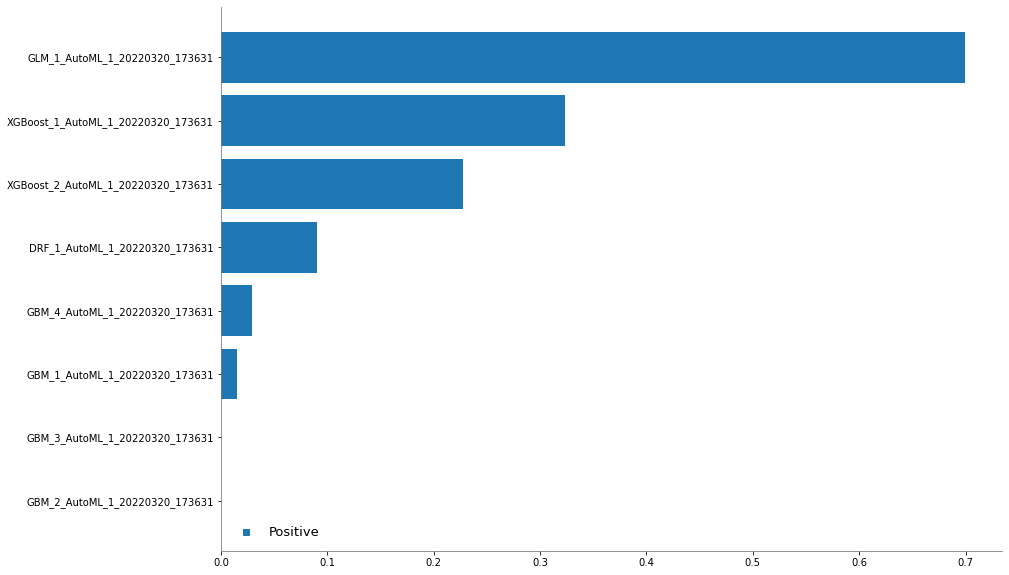

In [ ]:
metalearner.std_coef_plot()

In [ ]:
metalearner._model_json['output']

In [ ]:
leaderboard = aml_bin_clf.leaderboard
leaderboard.head(10)